Exercises XP: W5_D1

Exercise 1 : Small Quizz

### What is the key difference between traditional machine learning and deep learning?

**Answer:**  
Traditional machine learning often requires **manual feature engineering**, where humans decide which input variables to use and how to process them.  
In contrast, deep learning uses **neural networks with multiple layers** that automatically learn and extract relevant features from raw data during training.

---

### How do artificial neural networks (ANNs) mimic the human brain?

**Answer:**  
ANNs are inspired by the brain's structure.  
They consist of interconnected **artificial neurons** that process information and pass signals to each other.  
Just like biological neurons, each artificial neuron computes a weighted sum of its inputs, applies an activation function, and passes the result forward.

---

### Why does deep learning perform better on large datasets compared to traditional machine learning?

**Answer:**  
Deep learning models have a **high capacity to learn complex patterns** because they use many layers and parameters.  
With large datasets, they can capture intricate relationships and generalize better.  
Traditional models often plateau in performance because they can’t automatically learn sophisticated representations.

---

### What are some challenges of deep learning, and how can they be addressed?

**Answer:**  
Challenges include:
- **Need for large amounts of data**
- **High computational cost (requires GPUs)**
- **Risk of overfitting**

They can be addressed by:
- Using **data augmentation**
- Applying **regularization techniques** (dropout, weight decay)
- Using **transfer learning**
- Ensuring proper **model evaluation and validation**

---

### What is feature engineering, and why is it not needed in deep learning?

**Answer:**  
Feature engineering is the process of **manually designing and selecting input variables** that help a model perform better.  
Deep learning reduces the need for manual feature engineering because **neural networks automatically learn relevant features** from raw data, especially in images and text.

---

### What role do hidden layers play in a deep learning model?

**Answer:**  
Hidden layers are responsible for **learning internal representations of the data**.  
Each hidden layer transforms the input into more abstract features, enabling the network to capture complex relationships and make accurate predictions.

---

### In an artificial neural network (ANN), what is the function of an activation function?

**Answer:**  
Activation functions introduce **non-linearity** into the model, enabling the network to learn complex patterns.  
Without activation functions, the entire network would behave like a simple linear model, regardless of the number of layers.


## Exercise 2 : Building a Simple Perceptron Decision System

## 1. Weighted Sum Calculations

**Formula:**
Weighted Sum = (Temperature x 0.6) + (Rain x 0.4) + 2

---

**Case 1:**
- Temperature = 70°F
- Rain = 0

Weighted Sum = (70 x 0.6) + (0 x 0.4) + 2 = 42 + 0 + 2 = **44**

Activation: 44 > 20 → **Output = 1 (Yes, go outside)**

---

**Case 2:**
- Temperature = 50°F
- Rain = 1

Weighted Sum = (50 x 0.6) + (1 x 0.4) + 2 = 30 + 0.4 + 2 = **32.4**

Activation: 32.4 > 20 → **Output = 1 (Yes, go outside)**

---

## 2. Interpretation of Results

In both cases, the perceptron suggests going outside because the weighted sum exceeds the threshold of 20.

**Reason:**
- Temperature has a strong positive influence due to its weight (0.6).
- Even when it is rainy and colder (Case 2), the sum remains above 20.
- The bias (+2) slightly increases the overall score.


## Exercise 3: Simple Neural Network for MNIST

In [2]:
# Import TensorFlow and necessary modules
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [3]:
# Load the MNIST dataset
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize the data to [0,1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [6]:
# One-hot encode the labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

In [8]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# Train the model
history = model.fit(
    train_images,
    train_labels_onehot,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.4879 - val_accuracy: 0.9547 - val_loss: 0.1578
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9593 - loss: 0.1405 - val_accuracy: 0.9652 - val_loss: 0.1161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9743 - loss: 0.0901 - val_accuracy: 0.9676 - val_loss: 0.1036
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9808 - loss: 0.0658 - val_accuracy: 0.9704 - val_loss: 0.0955
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9858 - loss: 0.0493 - val_accuracy: 0.9755 - val_loss: 0.0839
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9886 - loss: 0.0381 - val_accuracy: 0.9747 - val_loss: 0.0891
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9911 - loss: 0.0318 - val_accuracy: 0.9767 - val_loss: 0.0821
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9934 - loss: 0.0236

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_onehot)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9739 - loss: 0.0904
Test accuracy: 0.9777


## Exercise 4: Forward Propagation Calculation

### 1. Calculation of Pre-Activation Output (z)

**Formula:**
z = (x₁ x w₁) + (x₂ x w₂) + b

**Values:**
- x₁ = 2000
- x₂ = 3
- w₁ = 0.5
- w₂ = 0.7
- b = 50,000

**Computation:**
z = (2000 x 0.5) + (3 x 0.7) + 50,000  
z = 1,000 + 2.1 + 50,000  
z = **51,002.1**

---

## 2. ReLU Activation

ReLU(z) = max(0, z) = **51,002.1**

---

## 3. Interpretation

The predicted house price is **$51,002.10**.

Since the output is positive, ReLU does not change the value.

### Exercise 5 : Implementing Forward and Backward Propagation in Python

In [13]:
import numpy as np

In [15]:
# Initialize input data (features)
x = np.array([4, 80])  # 4 hours studied, previous test score: 80

In [16]:
# Initialize weights and bias
w = np.array([0.6, 0.3])  # Initial weights
b = 10  # Initial bias

In [17]:
# Forward Propagation
def forward_propagation(x, w, b):
    z = np.dot(x, w) + b  # Weighted sum
    return z  # Linear activation (regression)

In [18]:
# Compute prediction
y_pred = forward_propagation(x, w, b)
y_true = 85  # Actual exam score

In [19]:
# Compute Loss (Mean Squared Error)
loss = 0.5 * (y_true - y_pred) ** 2

In [20]:
# Compute Gradients
grad_w = -(y_true - y_pred) * x  # Partial derivatives w.r.t weights
grad_b = -(y_true - y_pred)      # Partial derivative w.r.t bias

In [21]:
# Update Weights and Bias
learning_rate = 0.01
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

In [22]:
# Print Results
print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Gradients w.r.t Weights:", grad_w)
print("Gradient w.r.t Bias:", grad_b)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)

Initial Prediction: 36.4
Loss: 1180.98
Gradients w.r.t Weights: [ -194.4 -3888. ]
Gradient w.r.t Bias: -48.6
Updated Weights: [ 2.544 39.18 ]
Updated Bias: 10.486


### Interpretation of the Results

- **Initial Prediction:** 36.4
  - This is much lower than the true exam score of 85.
- **Loss:** 1180.98
  - The high loss indicates a large prediction error.
- **Gradients:**
  - Large negative gradients show that the weights and bias need to increase to improve the prediction.
- **Updated Weights and Bias:**
  - After applying gradient descent, the weights increased significantly to raise the predicted score in the next iteration.

**Why did the weights increase so much?**
Because the prediction was far too low, and gradient descent moves the weights in the direction that reduces the error. The input values (especially 80) amplify the gradients.

**Next steps:**
Running another forward propagation with the updated weights would result in a much higher prediction, reducing the loss.

In [23]:
import numpy as np

# Initialize input data (features)
x = np.array([4, 80])  # 4 hours studied, previous test score: 80

# Initialize weights and bias
w = np.array([0.1, 0.1])  # changed weights
b = 10  # Initial bias

# Forward Propagation
def forward_propagation(x, w, b):
    z = np.dot(x, w) + b  # Weighted sum
    return z  # Linear activation (regression)

# Compute prediction
y_pred = forward_propagation(x, w, b)
y_true = 85  # Actual exam score

# Compute Loss (Mean Squared Error)
loss = 0.5 * (y_true - y_pred) ** 2

# Compute Gradients
grad_w = -(y_true - y_pred) * x  # Partial derivatives w.r.t weights
grad_b = -(y_true - y_pred)      # Partial derivative w.r.t bias

# Update Weights and Bias
learning_rate = 0.01
w_new = w - learning_rate * grad_w
b_new = b - learning_rate * grad_b

# Print Results
print("Initial Prediction:", y_pred)
print("Loss:", loss)
print("Gradients w.r.t Weights:", grad_w)
print("Gradient w.r.t Bias:", grad_b)
print("Updated Weights:", w_new)
print("Updated Bias:", b_new)

Initial Prediction: 18.4
Loss: 2217.7799999999997
Gradients w.r.t Weights: [ -266.4 -5328. ]
Gradient w.r.t Bias: -66.6
Updated Weights: [ 2.764 53.38 ]
Updated Bias: 10.666


## Interpretation of Modified Initial Weights

- **Initial Prediction:** 18.4
  - Much lower than the true score of 85.
- **Loss:** 2217.78
  - Higher error compared to the previous scenario.
- **Gradients:**
  - Very large gradients indicate that the model needs to adjust weights significantly to reduce the error.
- **Updated Weights and Bias:**
  - The weights increased sharply to make the prediction closer to the true value in the next iteration.

**Conclusion:**
Choosing smaller initial weights leads to much lower initial predictions, higher errors, and bigger updates during gradient descent.


## Exercise 6: Visualizing Predictions on MNIST

In [24]:
# Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [26]:
# Normalize the data
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [27]:
# One-hot encode the labels
train_labels_onehot = to_categorical(train_labels, num_classes=10)
test_labels_onehot = to_categorical(test_labels, num_classes=10)

In [28]:
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
# Fit the model on the training data
history = model.fit(
    train_images,
    train_labels_onehot,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8629 - loss: 0.4830 - val_accuracy: 0.9570 - val_loss: 0.1471
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9610 - loss: 0.1317 - val_accuracy: 0.9639 - val_loss: 0.1223
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9735 - loss: 0.0898 - val_accuracy: 0.9690 - val_loss: 0.1066
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9806 - loss: 0.0644 - val_accuracy: 0.9732 - val_loss: 0.0903
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9854 - loss: 0.0492 - val_accuracy: 0.9738 - val_loss: 0.0924


## Interpretation of Training Results

The model was trained for **5 epochs** on the MNIST dataset with the following observations:

- **Epoch 1:**
  - Training accuracy: ~86%
  - Validation accuracy: ~95%
  - The loss was relatively high as the model started learning basic patterns.

- **Epoch 2-3:**
  - Training accuracy increased to ~96-97%.
  - Validation accuracy continued improving, reaching ~96-97%.
  - The loss decreased significantly, showing good convergence.

- **Epoch 4-5:**
  - Training accuracy exceeded 98%.
  - Validation accuracy stabilized around ~97.3-97.4%.
  - Validation loss continued to decline slightly.

**Interpretation:**
- The model learned effectively and reached high performance.
- The validation accuracy remained close to the training accuracy, indicating **good generalization** without severe overfitting.
- The loss curve shows steady improvement over epochs.

**Conclusion:**
This simple neural network achieved **excellent results** for handwritten digit classification on MNIST. Further improvements could be obtained by:
- Increasing the number of epochs.
- Using a convolutional neural network (CNN) architecture for even higher accuracy.

In [31]:
# Make predictions on the test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


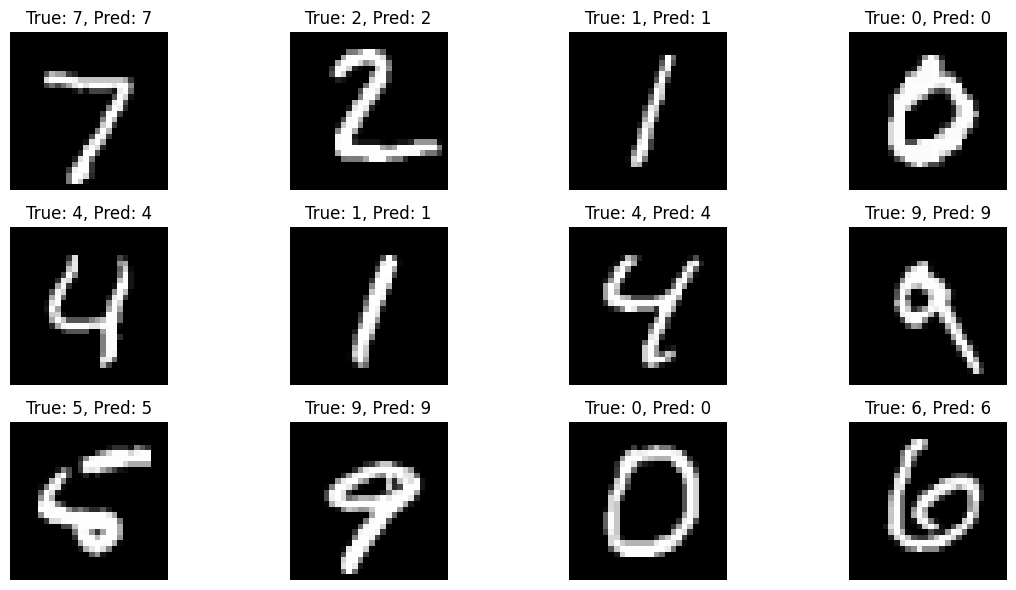

In [32]:
# Visualize some predictions
plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(test_images[i], cmap="gray")
    plt.title(f"True: {test_labels[i]}, Pred: {predicted_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()